In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [5]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000


In [6]:
df.isnull().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [7]:
new_cases_df = df[['New cases', 'Active', 'Confirmed']]

In [14]:
xs = np.arange(1, df.shape[0]+1)

In [15]:
plt.rcParams["figure.figsize"] = (10, 10)

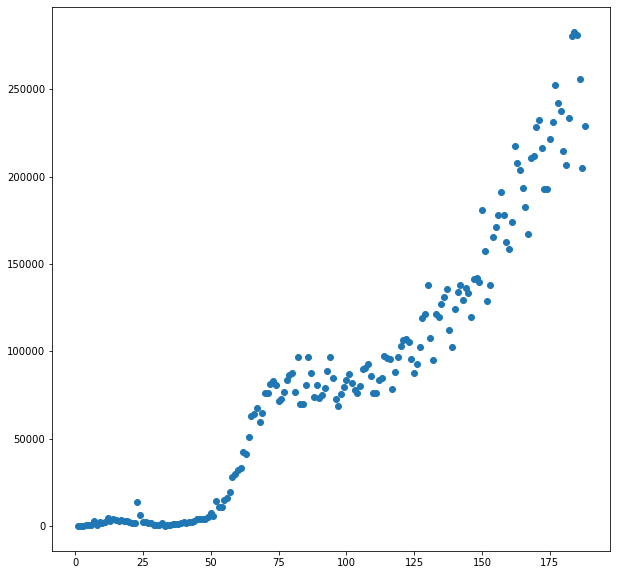

In [16]:
plt.scatter(xs, new_cases_df['New cases'])
plt.show()

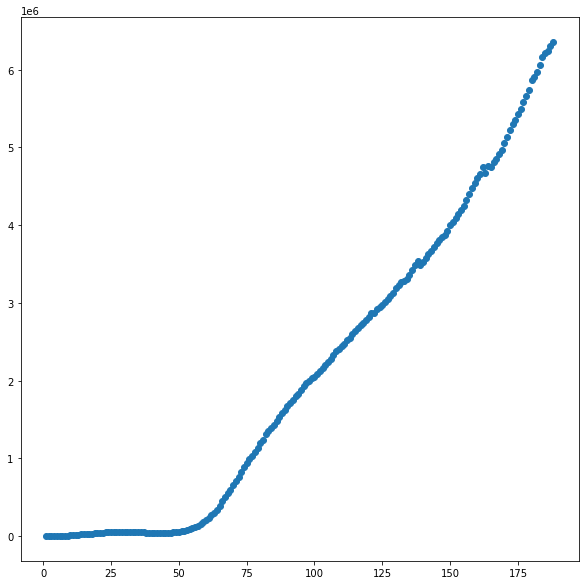

In [17]:
plt.scatter(xs, new_cases_df['Active'])
plt.show()

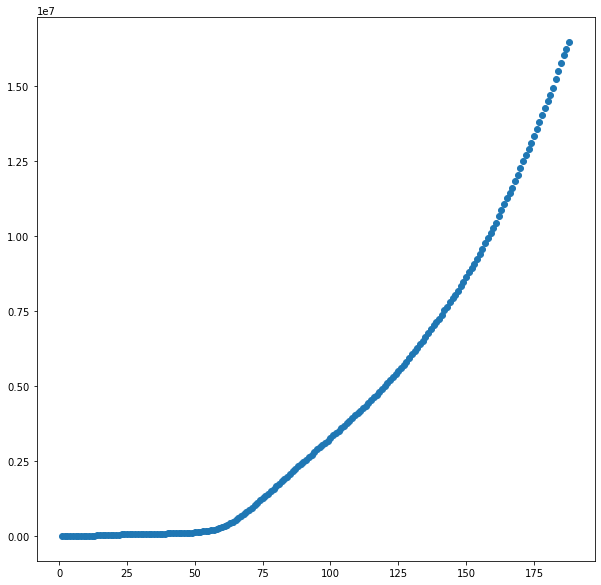

In [18]:
plt.scatter(xs, new_cases_df['Confirmed'])
plt.show()

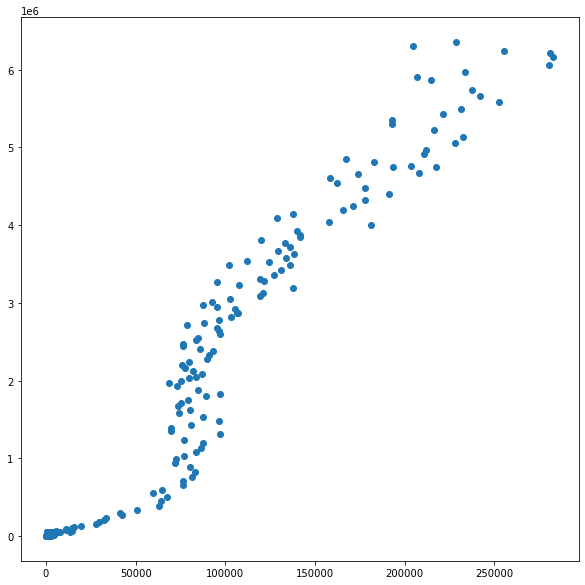

In [20]:
plt.scatter(df['New cases'], df['Active'])
plt.show()

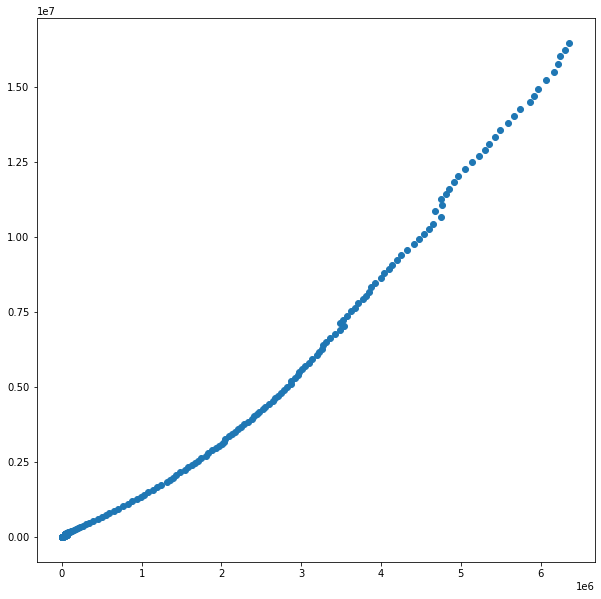

In [22]:
plt.scatter(df['Active'], df['Confirmed'])
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
features = df[['New cases', 'Active']]
target = df['Confirmed']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, Y_train)

LinearRegression()

In [28]:
prediction = model.predict(X_test)

In [29]:
r2_score(Y_test, prediction)

0.9672659188879429

In [30]:
xs = np.arange(1, len(Y_test) + 1)

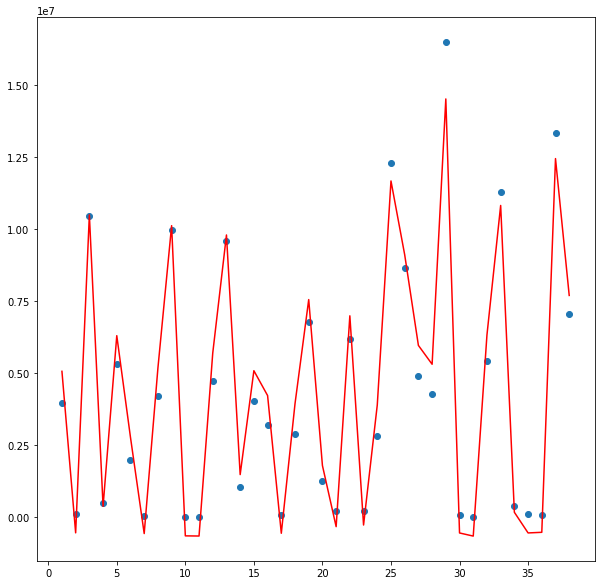

In [31]:
plt.scatter(xs, Y_test)
plt.plot(xs, prediction, color='red')
plt.show()

In [32]:
prediction = model.predict(features)

In [33]:
r2_score(df['Confirmed'], prediction)

0.9739552673126819

In [36]:
xs = np.arange(1, df.shape[0]+1)

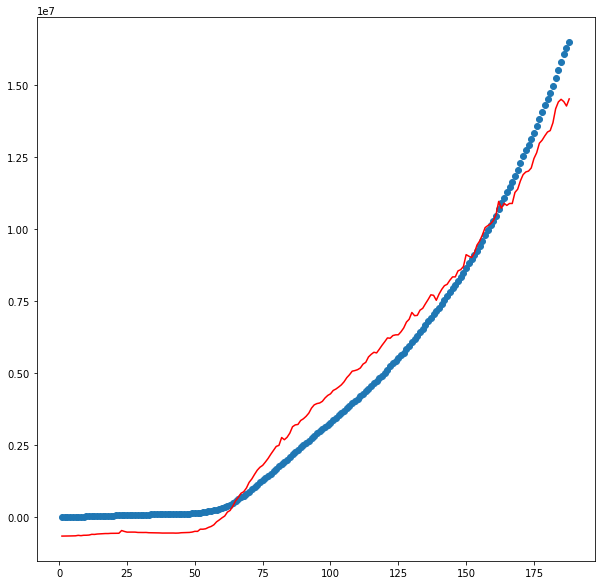

In [37]:
plt.scatter(xs, df['Confirmed'])
plt.plot(xs, prediction, color='red')
plt.show()

In [42]:
df.sort_values(['Active', 'New cases'], ascending=False).head(10)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
187,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
182,2020-07-22,15227725,623540,8541255,6062930,280647,6983,176269,4.09,56.09,7.30,187
181,2020-07-21,14947078,616557,8364986,5965535,233565,6238,174209,4.12,55.96,7.37,187
180,2020-07-20,14713623,610319,8190777,5912527,206778,4160,158542,4.15,55.67,7.45,187
179,2020-07-19,14506845,606159,8032235,5868451,214647,4029,87685,4.18,55.37,7.55,187
178,2020-07-18,14292198,602130,7944550,5745518,237635,5627,150790,4.21,55.59,7.58,187


In [44]:
model.predict(pd.DataFrame({ 'New cases': [240000], 'Active': [639834] }))

array([2115389.19977186])

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
model = DecisionTreeRegressor(criterion="friedman_mse", random_state=0)
model.fit(X_train, Y_train)
prediction_test = model.predict(X_test)
r2_score(Y_test, prediction_test)

0.9978088103014621

In [65]:
xs_test = np.arange(1, X_test.shape[0] + 1)
xs_features = np.arange(1, features.shape[0] + 1)

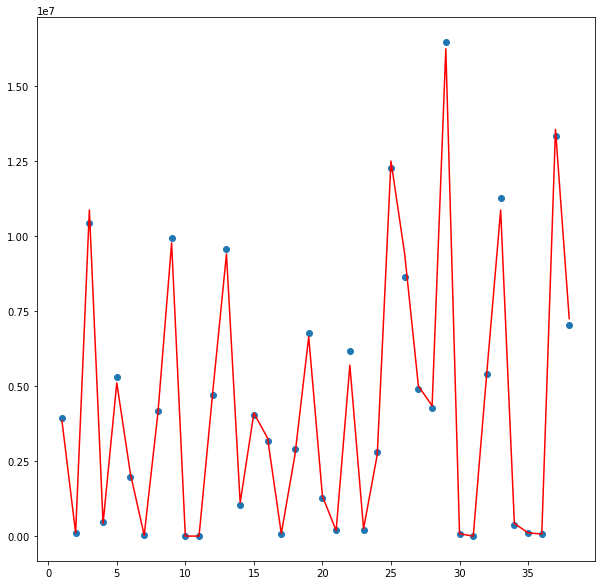

In [66]:
plt.scatter(xs_test, Y_test)
plt.plot(xs_test, prediction_test, color='red')
plt.show()

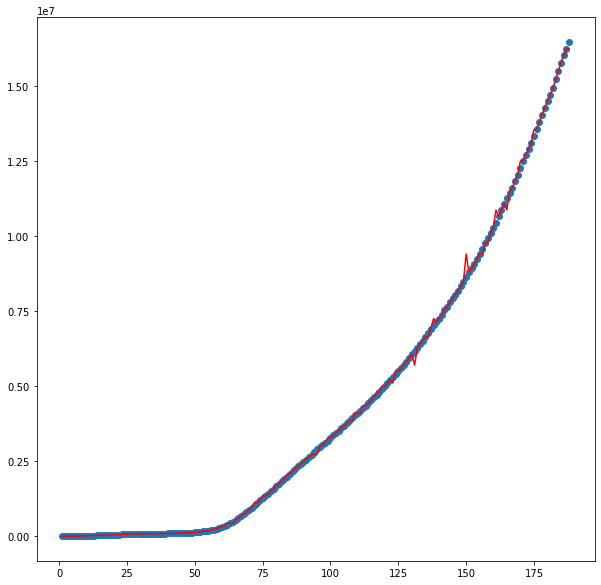

In [67]:
prediction = model.predict(features)
plt.scatter(xs_features, target)
plt.plot(xs_features, prediction, color='red')
plt.show()

In [68]:
model.predict(pd.DataFrame({ 'New cases': [240000], 'Active': [639834] }))

array([1112123.])

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [7]:
features = df[['New cases', 'Active']]
target = df['Confirmed']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [9]:
model = RandomForestRegressor(random_state=0)

In [10]:
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [11]:
prediction = model.predict(X_test)

In [13]:
from sklearn.metrics import r2_score

In [14]:
r2_score(Y_test, prediction)

0.9990626426963626

In [15]:
plt.rcParams['figure.figsize'] = (16, 12)

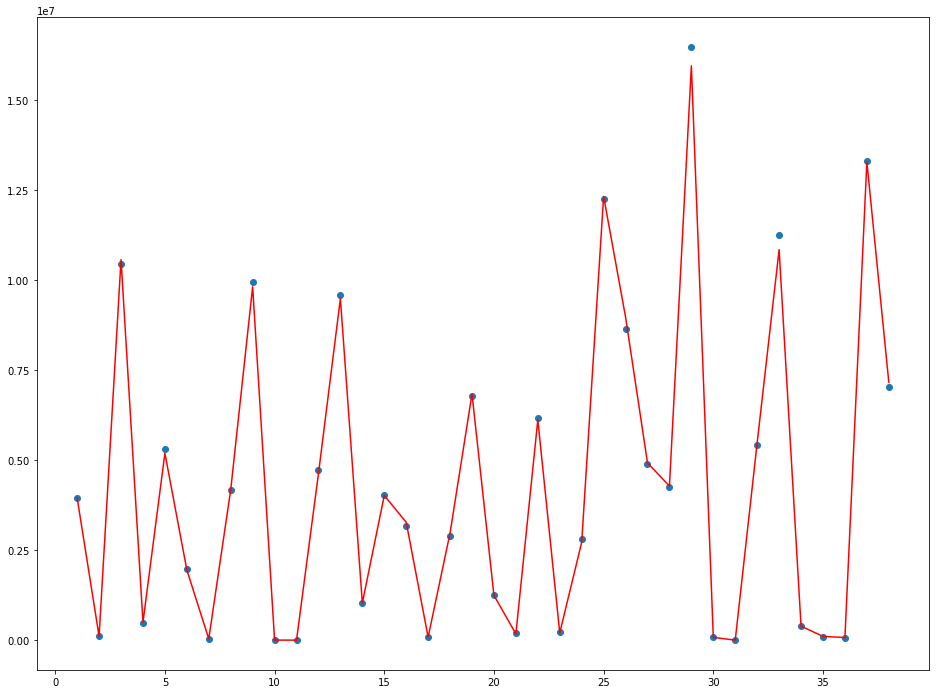

In [16]:
xs = np.arange(1, X_test.shape[0]+1)
plt.scatter(xs, Y_test)
plt.plot(xs, prediction, color='red')
plt.show()

In [17]:
prediction = model.predict(features)

In [18]:
r2_score(target, prediction)

0.9997380575256047

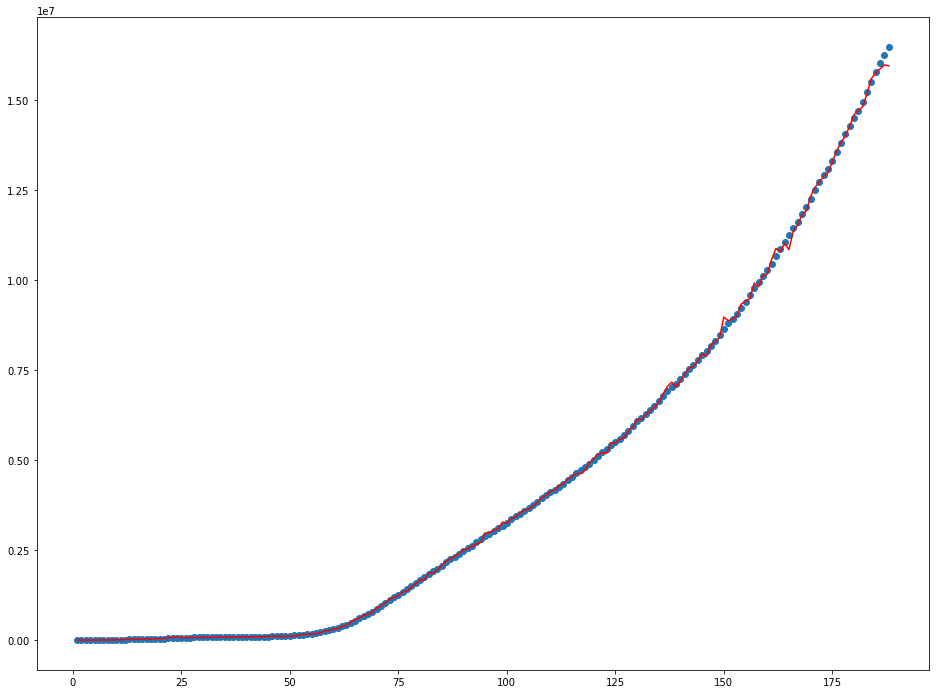

In [19]:
xs = np.arange(1, features.shape[0]+1)
plt.scatter(xs, target)
plt.plot(xs, prediction, color='red')
plt.show()

In [20]:
model.predict(pd.DataFrame({ 'New cases': [240000], 'Active': [639834] }))

array([1382226.15])